In [1]:
from mitotic_classifer import *

# Running SVM model with file:#
## check the number of M and G2 cells

In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/single_cell_data/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288,...,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288
G1,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840,...,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840
G2,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363,...,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363
Late S,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978,...,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978
M,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459,...,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459
Polyploid,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415,...,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415
Polyploid (replicating),3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,...,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799
Sub-G1,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,...,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921


## Merge two files

In [3]:
df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,0.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,13.0,136.0,...,0.968335,-0.046422,0.949624,-0.074571,1.462911,0.548842,1.120828,0.164565,G2,G2/M
1,1.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,16.0,147.0,...,0.917730,-0.123858,0.929528,-0.105430,2.604441,1.380974,1.211483,0.276774,G1,G1
2,2.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,17.0,98.0,...,4.848917,2.277662,0.985389,-0.021235,1.033012,0.046856,0.807655,-0.308188,Late S,S
3,5.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,20.0,203.0,...,1.000066,0.000095,0.952695,-0.069913,1.938723,0.955107,1.673000,0.742438,Polyploid,Polyploid
4,4.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,19.0,130.0,...,1.003778,0.005440,0.969189,-0.045151,1.755076,0.811534,1.071380,0.099470,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,262.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,304.0,314.0,...,0.968910,-0.045565,0.985267,-0.021413,1.205830,0.270027,1.851099,0.888382,G2,G2/M
1783,261.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,303.0,246.0,...,2.431181,1.281657,1.023444,0.033433,1.647256,0.720065,1.450224,0.536276,Late S,S
1784,265.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,308.0,309.0,...,1.039146,0.055399,0.993885,-0.008849,1.224424,0.292103,1.821623,0.865224,G2,G2/M
1785,267.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,311.0,473.0,...,1.100063,0.137586,1.009845,0.014134,2.805569,1.488294,2.788439,1.479458,Polyploid,Polyploid


In [4]:
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771,...,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771
G1,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081,...,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081
G2,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261,...,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261
Late S,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347,...,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347
M,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
Polyploid,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982,...,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982
Polyploid (replicating),1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Sub-G1,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640


## select all the M cell and equal number G2 cells, extracting the interesting columns making a dataset for training

In [5]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,MM231,NT,134.0,156.0,23584.318282,16768.360278,2.615864e+06,746.0,23584.318282,5528.808533,...,8968.999913,15828.560460,9292.188568,1,2.615864e+06,4.281985,1.058926,1.556822,1.285655,G2
1,MM231,NT,426.0,145.0,20690.937921,15403.970774,2.233576e+06,694.0,20690.937921,4970.728177,...,8208.550524,17234.812819,8548.374168,1,2.233576e+06,3.656206,1.122064,1.448303,1.195000,G2
2,RPE-1,siCdc27,269.0,245.0,29186.560960,9822.139636,2.406424e+06,378.0,29186.560960,7286.369638,...,11128.522350,8764.695416,5134.506614,1,2.406424e+06,4.527956,1.120001,0.260311,1.444329,M
3,U2OS,siCdc27,27.0,124.0,31421.069884,20777.428058,2.576401e+06,297.0,31421.069884,11400.803422,...,20098.912696,39021.518091,12634.969714,1,2.576401e+06,3.652107,1.088544,0.462654,0.754956,M
4,RPE-1,siCdc27,182.0,161.0,36653.756797,12498.227054,2.012215e+06,420.0,36653.756797,6844.289810,...,12082.643722,36196.014238,8170.197513,1,2.012215e+06,3.786206,1.050068,0.289234,0.949130,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,U2OS,NT,929.0,212.0,21543.611540,15307.530292,3.245196e+06,298.0,21543.611540,12146.182222,...,8268.597113,14888.097984,8684.828309,1,3.245196e+06,4.600139,1.011135,0.464212,1.290731,G2
4308,U2OS,siCdc27,65.0,118.0,39298.500955,23490.618298,2.771893e+06,224.0,39298.500955,14805.116128,...,21979.323018,28705.071989,11711.676064,1,2.771893e+06,3.929221,1.195281,0.348938,0.718426,M
4309,RPE-1,siCdc27,168.0,295.0,11219.774896,6818.370501,2.011419e+06,3287.0,11219.774896,1581.738194,...,5033.278943,12915.159548,4853.832171,1,2.011419e+06,3.784710,0.989660,2.263600,1.739090,G2
4310,U2OS,siCdc27,415.0,108.0,35824.842874,23023.211699,2.486507e+06,232.0,35824.842874,13647.108943,...,22525.231901,26680.418998,13642.615388,1,2.486507e+06,3.524680,1.204748,0.361400,0.657542,M


# input data (2156 G2 cell + 2156 M cell)
##  cross validation

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.94097222 0.96527778 0.95138889 0.97222222 0.95121951 0.95470383
 0.95121951 0.93031359 0.95121951 0.94076655]  Mean:0.9509303619821912


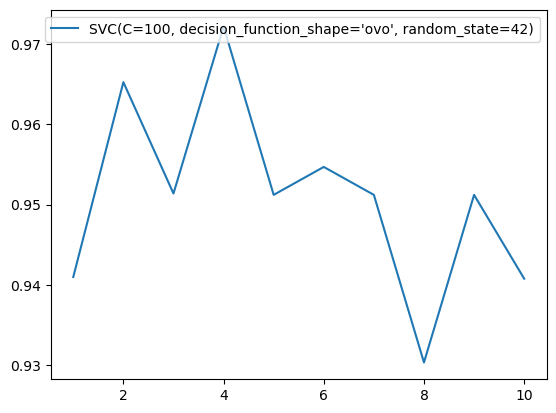

In [6]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

In [8]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24)
clf_svm_hp =GridSearchCV(clf_svm,{'C':[0.1,10,100],"gamma":['scale','auto'],'decision_function_shape':['ovo','ovr'],},cv=5,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154135,0.027966,0.057160,0.011176,0.1,ovo,scale,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.546087,0.551304,...,0.564377,0.014836,5,0.565463,0.564158,0.559374,0.564158,0.561304,0.562892,0.002223
1,0.104430,0.002195,0.044803,0.000339,0.1,ovo,auto,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
2,0.129849,0.001727,0.050043,0.001015,0.1,ovr,scale,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.546087,0.551304,...,0.564377,0.014836,5,0.565463,0.564158,0.559374,0.564158,0.561304,0.562892,0.002223
3,0.102318,0.000498,0.044811,0.000182,0.1,ovr,auto,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
4,0.076547,0.001583,0.029393,0.000659,10,ovo,scale,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.897391,0.918261,...,0.896659,0.012379,3,0.894737,0.891692,0.901696,0.899522,0.896087,0.896747,0.003528
5,0.107739,0.002895,0.044721,0.000325,10,ovo,auto,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.075352,0.000908,0.029013,0.000340,10,ovr,scale,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.897391,0.918261,...,0.896659,0.012379,3,0.894737,0.891692,0.901696,0.899522,0.896087,0.896747,0.003528
7,0.107186,0.002886,0.044641,0.000092,10,ovr,auto,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.049170,0.000973,0.016860,0.000152,100,ovo,scale,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.918261,0.939130,...,0.922407,0.008848,1,0.923010,0.918660,0.923010,0.923445,0.922609,0.922147,0.001763
9,0.107201,0.002967,0.044789,0.000177,100,ovo,auto,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [9]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104675,0.013023,0.003336,0.000458,balanced,entropy,sqrt,30,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939804,0.003242,41,0.999565,0.999130,0.999130,0.999130,0.99913,0.999217,0.000174
1,0.128809,0.010494,0.003484,0.000059,balanced,entropy,sqrt,40,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939802,0.006309,45,1.000000,0.999130,0.999565,0.999565,1.00000,0.999652,0.000326
2,0.155632,0.004385,0.004105,0.000320,balanced,entropy,sqrt,50,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006489,25,1.000000,0.999565,1.000000,1.000000,1.00000,0.999913,0.000174
3,0.182327,0.001748,0.004492,0.000054,balanced,entropy,sqrt,60,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006763,25,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,0.226705,0.029221,0.005175,0.000247,balanced,entropy,sqrt,70,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.940149,0.006787,37,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.205552,0.004281,0.004579,0.000086,balanced_subsample,log_loss,log2,60,"{'class_weight': 'balanced_subsample', 'criter...",0.946087,...,0.941889,0.007301,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
60,0.239063,0.003193,0.005212,0.000189,balanced_subsample,log_loss,log2,70,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.939453,0.006585,49,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
61,0.272959,0.004020,0.005758,0.000187,balanced_subsample,log_loss,log2,80,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.941541,0.005928,5,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
62,0.306284,0.002781,0.006386,0.000061,balanced_subsample,log_loss,log2,90,"{'class_weight': 'balanced_subsample', 'criter...",0.940870,...,0.941193,0.006854,9,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


# RandomForestClassifier

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9541029207232267


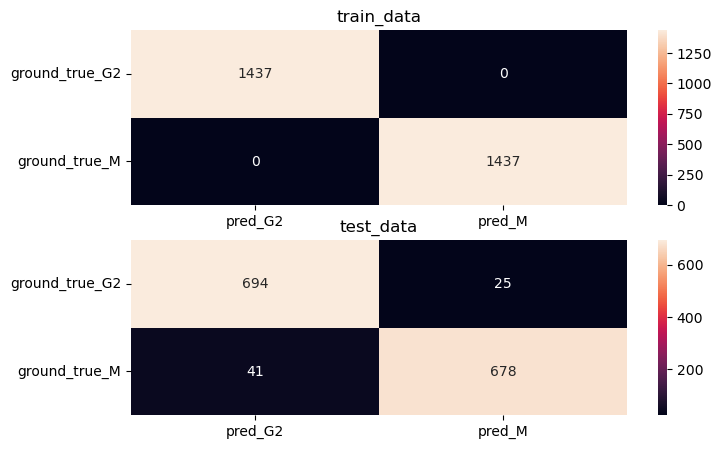

In [10]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the accuracy of model run with train data 0.9794711203897007
the accuracy of model run with test data 0.9339360222531293


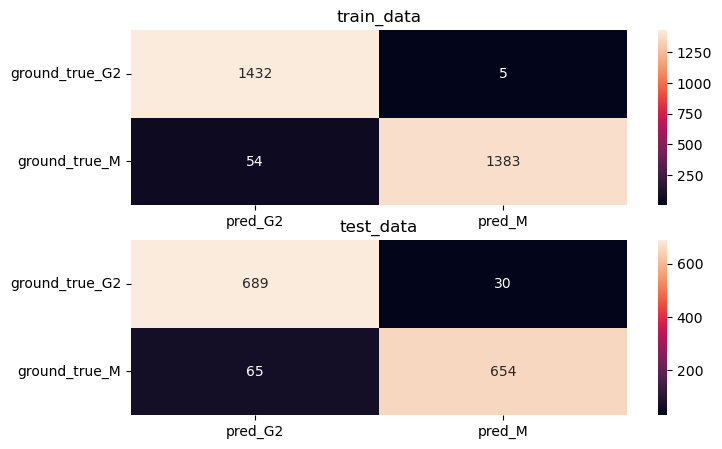

In [7]:
# ['linear','linear','poly','rbf','sigmoid']
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 0.9794711203897007
the accuracy of model run with test data 0.9339360222531293


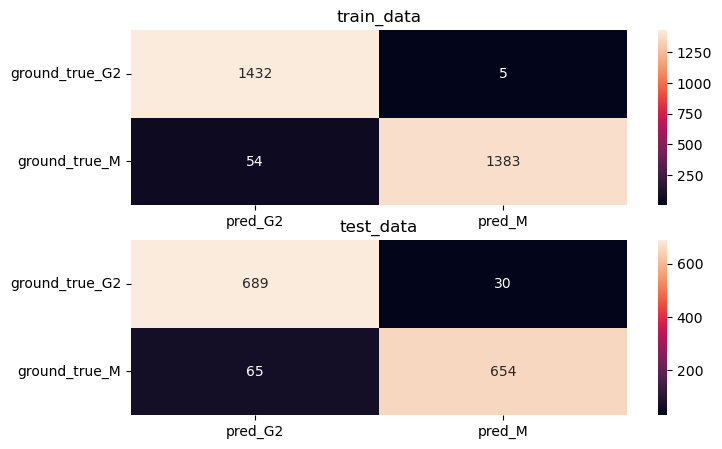

In [8]:
from joblib import dump, load
dump(clf_svm_hp, 'filename.joblib')
pretrained_svm=load('pretrained_SVM_U20S_without_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [11]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
        'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,U2OS,siCdc27,390.0,122.0,32842.714461,21921.273534,2.674395e+06,288.0,32842.714461,11887.795037,...,14597.560217,21969.891695,8308.967244,1,2.674395e+06,3.791016,1.087254,0.448634,0.742779,M
1,RPE-1,siCdc27,131.0,266.0,13318.820415,9158.373264,2.436127e+06,2672.0,13318.820415,1993.374344,...,8467.324282,28128.063514,8473.506012,1,2.436127e+06,4.583846,1.055176,1.840079,1.568128,G2
2,RPE-1,siCdc27,443.0,361.0,8812.106200,6922.448188,2.499004e+06,5046.0,8812.106200,1401.394064,...,6075.259894,19094.967062,6057.895356,1,2.499004e+06,4.702155,0.996504,3.474939,2.128174,G2
3,U2OS,NT,598.0,225.0,18355.563577,13815.211946,3.108423e+06,887.0,18355.563577,4906.609844,...,12006.271546,23868.799780,12252.238867,1,3.108423e+06,4.406259,1.056141,1.381731,1.369880,G2
4,U2OS,siCdc27,445.0,81.0,48943.939448,28032.209256,2.270609e+06,244.0,48943.939448,13071.495504,...,23895.060622,43150.852694,16831.689609,1,2.270609e+06,3.218640,1.284183,0.380093,0.493157,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,U2OS,siCdc27,356.0,101.0,45014.414342,26804.738160,2.707279e+06,315.0,45014.414342,11634.867973,...,20338.485109,45581.324838,12237.691140,1,2.707279e+06,3.837629,1.303397,0.490694,0.614924,M
4308,MM231,siCdc27,207.0,93.0,38064.300294,21298.082212,1.980722e+06,236.0,38064.300294,11262.130081,...,16695.647723,33438.852458,12167.262201,1,1.980722e+06,3.242302,0.971084,0.492507,0.766448,M
4309,MM231,NT,299.0,321.0,14491.482824,9698.677033,3.113275e+06,1955.0,14491.482824,3343.976368,...,9521.961472,20618.238161,9148.266184,1,3.113275e+06,5.096212,0.978146,4.079874,2.645483,G2
4310,MM231,NT,210.0,141.0,30599.979346,18256.230232,2.574128e+06,415.0,30599.979346,9067.703786,...,9816.847987,17852.423502,6679.216386,1,2.574128e+06,4.213667,0.948716,0.866060,1.162035,M


the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.95486111 0.96527778 0.92361111 0.95138889 0.91637631 0.96864111
 0.95121951 0.91637631 0.94425087 0.94425087]  Mean:0.9436253871467286


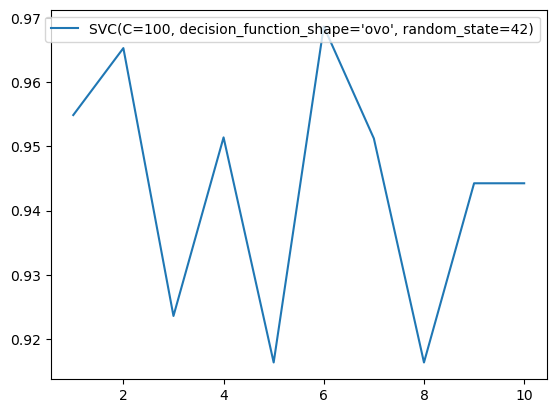

the accuracy of model run with train data 0.9826026443980515
the accuracy of model run with test data 0.9457579972183588


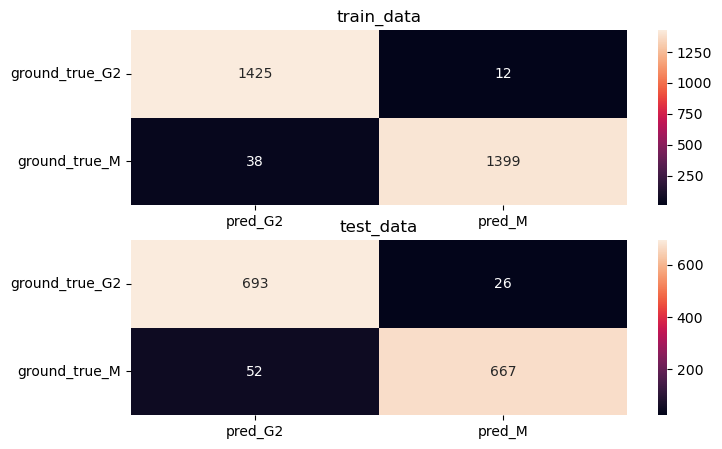

In [12]:

x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 0.9826026443980515
the accuracy of model run with test data 0.9457579972183588


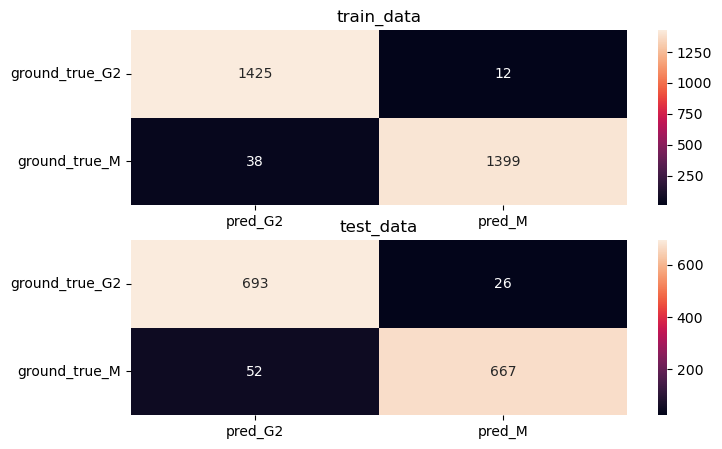

In [14]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)